In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import zscore
import statsmodels.api as sm
import warnings
import os

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [3]:
os.chdir('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/study/study2')

In [4]:
file_loc = 'raw/Study2_June_14_2024_17.29_final.xlsx'
df = pd.read_excel(file_loc)
df

,ResponseId,Ads_OP_1,Ads_OP_2,Ads_OP_3,Ads_OP_4,Ads_OP_5,Ads_OP_6,Ads_CO_1,Ads_CO_2,Ads_CO_3,Ads_CO_4,Ads_CO_5,Ads_CO_6,Ads_EX_1,Ads_EX_2,Ads_EX_3,Ads_EX_4,Ads_EX_5,Ads_EX_6,Ads_AG_1,Ads_AG_2,Ads_AG_3,Ads_AG_4,Ads_AG_5,Ads_AG_6,Cha_OP_1,Cha_OP_2,Cha_OP_3,Cha_OP_4,Cha_OP_5,Cha_OP_6,Cha_OP_7,Cha_CO_1,Cha_CO_2,Cha_CO_3,Cha_CO_4,Cha_CO_5,Cha_CO_6,Cha_CO_7,Cha_EX_1,Cha_EX_2,Cha_EX_3,Cha_EX_4,Cha_EX_5,Cha_EX_6,Cha_EX_7,Cha_AG_1,Cha_AG_2,Cha_AG_3,Cha_AG_4,Cha_AG_5,Cha_AG_6,Cha_AG_7,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30,gender,age,education,race,employment,income
0,{{%PROLIFIC_PID%}},30,0,45,31,46,47,45,0,37,47,42,43,37,46,41,43,42,45,55,44,40,41,40,46,50,61,66,68,71,64,63,60,63,55,62,63,60,60,34,28,32,30,50,39,39,38,0,0,0,54,0,0,5,4,4,4,5,2,2,4,4,3,2,3,3,4,2,1,3,3,3,2,3,5,4,4,4,4,3,2,2,3,1,31,4,4,2,2
1,5e49c48fac17f4000c1bfcbc,50,54,50,50,58,51,42,54,61,61,64,67,18,50,23,21,15,8,58,50,65,61,52,55,65,74,88,85,58,59,59,75,60,76,80,81,79,58,60,62,59,62,66,73,60,71,72,80,80,82,83,79,4,4,3,5,4,2,2,3,3,2,3,2,5,3,3,2,3,3,2,3,4,4,4,3,5,4,3,3,4,2,2,43,5,1,6,10
2,5f38251e3cec500d267efb92,20,15,30,25,30,15,75,80,79,90,77,85,80,85,97,89,82,100,73,73,83,71,74,90,95,84,100,100,100,90,100,88,98,97,91,97,86,86,86,88,100,100,96,100,80,98,100,97,97,100,95,94,4,4,2,3,2,4,2,2,2,1,3,4,4,4,4,3,2,3,4,3,2,4,4,4,5,1,3,2,2,2,1,22,4,1,2,1
3,5cd043b25b04850017e5d028,1,13,10,11,6,6,50,50,39,0,50,50,3,4,3,2,4,4,89,93,98,100,100,100,70,70,76,81,89,88,51,82,78,85,86,87,83,85,0,50,50,50,50,50,50,84,92,93,94,89,99,97,4,4,2,3,2,2,1,1,2,3,3,4,4,4,4,3,1,4,5,3,2,5,5,5,5,2,1,1,2,3,2,58,2,1,7,10
4,63d37e4ea0985c4dc486ff8e,60,40,60,60,70,70,40,40,40,30,30,30,70,70,80,80,80,80,40,20,20,20,40,30,60,71,80,71,90,80,75,84,82,83,86,80,82,80,75,79,71,77,77,78,76,90,85,84,91,91,87,94,4,4,3,5,4,2,4,3,5,4,2,1,4,2,4,3,5,4,3,2,4,4,4,4,4,2,5,4,4,2,1,32,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,648343299ec8050d10aee27d,0,0,0,0,0,0,20,61,20,60,10,1,0,0,0,0,0,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,97,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,4,5,1,4,4,1,2,1,4,2,2,4,4,4,4,2,1,5,4,2,4,5,5,2,4,2,1,1,1,2,2,53,2,1,4,6
130,6601b51675d287d6a62f11c4,82,78,90,94,97,100,86,82,86,90,93,97,91,85,92,100,100,100,30,15,10,10,6,0,91,93,95,98,98,99,99,92,92,95,97,99,99,98,93,95,96,97,100,99,98,92,95,93,96,99,99,95,4,5,2,2,5,4,1,1,1,1,4,5,4,5,4,4,1,4,5,1,2,5,5,5,4,2,2,2,1,1,2,55,5,2,9,11
131,5daf506a5bd1b30013605e31,60,70,100,100,100,100,100,80,75,90,70,50,90,85,95,50,95,100,20,35,15,25,25,20,100,95,65,85,100,95,100,100,100,100,95,100,99,100,100,100,100,100,100,98,100,100,100,100,99,100,99,100,2,5,1,3,4,3,1,1,1,2,4,3,4,4,4,5,1,5,4,2,3,5,5,5,4,1,2,3,2,2,2,51,3,1,6,3
132,656f2e99bd2939f9b3f9d090,87,86,86,82,83,82,72,72,72,76,75,77,91,83,86,86,87,90,76,74,77,75,77,79,92,92,90,93,91,93,94,80,84,87,86,84,87,87,85,84,88,88,86,87,89,92,84,87,86,83,87,83,3,5,1,4,5,5,4,2,1,2,5,5,5,5,5,5,2,5,5,4,3,5,5,5,4,4,3,2,2,2,1,43,5,2,7,12


In [5]:
# Exclude invalid participants
preview_ids = ['{{%PROLIFIC_PID%}}']
pilot_ids = ['5e49c48fac17f4000c1bfcbc', '5f38251e3cec500d267efb92', '5cd043b25b04850017e5d028', '63d37e4ea0985c4dc486ff8e', '6565fff05ec125a5ff77a77c',
             '6146eadbe88132805e5e3139', '5b987c55bb32a600018302dc', '5f00b44e836b900755d6da5c', '60f5569b3a95a18a91dc5d21']
answer_not_valid_ids = ['65e33239b5fa3ca93950aa67', '5dbc46b70338051eb7999760', '640c92a322b87202716ce6a6', '65c017a404cde4687fdad22e', '5c6d7db58f6257000148f61d',
                        '5916bba1c40353000150c46c', '5efb31fa8cd32f04bf048643', '646792a49a85f35e7a7f5169', '664f9c1098a3ae9c463e6879', '643adb4a213b87bfc7e21e3f',
                        '662c62abadd0ff2671ea8876', '66188b0cd0f8a01345be56e7', '65d306f8b16eb5011ccb2025', '66350027a37d96b687525725', '6476122c3edb0289e7d0efb2',
                        '664decb8e9c4c9c4c3359ac8', '65f1b8db932f5ad974458e46', '6668fd75b5b602c2f510599a', '648343299ec8050d10aee27d', '5daf506a5bd1b30013605e31']

invalid_ids = preview_ids + pilot_ids + answer_not_valid_ids

print(f"original shape {df.shape}")
df = df[~df['ResponseId'].isin(invalid_ids)]
print(f"final df shape {df.shape}")

original shape (134, 89)
final df shape (104, 89)


In [6]:
df.dtypes

ResponseId    object
Ads_OP_1       int64
Ads_OP_2       int64
Ads_OP_3       int64
Ads_OP_4       int64
               ...  
age            int64
education      int64
race           int64
employment     int64
income         int64
Length: 89, dtype: object

In [7]:
df.isna().sum()

ResponseId    0
Ads_OP_1      0
Ads_OP_2      0
Ads_OP_3      0
Ads_OP_4      0
             ..
age           0
education     0
race          0
employment    0
income        0
Length: 89, dtype: int64

# Transform df

In [8]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
df = df[selected_cols]
#df = df.iloc[:,:-1] # remove attention check
df.head()

,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30
10,4,4,3,2,2,4,3,3,3,3,5,5,4,5,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4
11,2,4,2,4,4,4,2,2,1,1,4,4,5,4,4,5,5,4,4,2,2,4,4,5,4,4,4,2,1,2
12,2,5,1,2,2,5,4,2,2,4,3,4,5,4,4,5,4,5,4,4,2,4,5,5,5,2,4,2,2,2
13,3,4,3,5,5,3,3,4,4,2,3,3,4,2,4,3,3,2,2,2,3,4,4,3,4,2,3,3,4,2
14,4,5,4,4,4,4,1,4,4,1,4,2,5,4,4,2,1,4,4,2,2,5,4,4,4,4,2,2,2,2


In [9]:
reversed = [1, 21, 26, 7, 17, 27, 3, 8, 28, 14, 19, 24, 10, 20, 30]

big5 = dict({
             'Extraversion' : [1, 6, 11, 16, 21, 26],
             'Agreeableness' : [2, 7, 12, 17, 22, 27],
             'Conscientiousness' : [3, 8, 13, 18, 23, 28],
             'Neuroticism' : [4, 9, 14, 19, 24, 29],
             'Open_Mindedness' : [5, 10, 15, 20, 25, 30]})

big5

{'Extraversion': [1, 6, 11, 16, 21, 26],
 'Agreeableness': [2, 7, 12, 17, 22, 27],
 'Conscientiousness': [3, 8, 13, 18, 23, 28],
 'Neuroticism': [4, 9, 14, 19, 24, 29],
 'Open_Mindedness': [5, 10, 15, 20, 25, 30]}

In [10]:
list(big5.keys())[0]

'Extraversion'

In [11]:
for value in big5.values():
    print(value)

[1, 6, 11, 16, 21, 26]
[2, 7, 12, 17, 22, 27]
[3, 8, 13, 18, 23, 28]
[4, 9, 14, 19, 24, 29]
[5, 10, 15, 20, 25, 30]


In [12]:
df_c = df.copy()
df_c.columns = [col.split('_')[1] for col in df_c.columns]
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
10,4,4,3,2,2,4,3,3,3,3,5,5,4,5,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4
11,2,4,2,4,4,4,2,2,1,1,4,4,5,4,4,5,5,4,4,2,2,4,4,5,4,4,4,2,1,2
12,2,5,1,2,2,5,4,2,2,4,3,4,5,4,4,5,4,5,4,4,2,4,5,5,5,2,4,2,2,2
13,3,4,3,5,5,3,3,4,4,2,3,3,4,2,4,3,3,2,2,2,3,4,4,3,4,2,3,3,4,2
14,4,5,4,4,4,4,1,4,4,1,4,2,5,4,4,2,1,4,4,2,2,5,4,4,4,4,2,2,2,2


In [13]:
def reverse_scores(row, df, col_str):
    # 5 = max big 5 questionaries score
    return (max(df[col_str].max(), 5) + 1) - row

In [14]:
for col in reversed:
    col_str = str(col)
    if col_str in df_c.columns:
        df_c[col_str] = df_c[col_str].apply(lambda row: reverse_scores(row, df_c, col_str))

df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
10,2,4,3,2,2,4,3,3,3,3,5,5,4,1,4,4,5,2,3,4,3,4,5,2,3,4,3,4,2,2
11,4,4,4,4,4,4,4,4,1,5,4,4,5,2,4,5,1,4,2,4,4,4,4,1,4,2,2,4,1,4
12,4,5,5,2,2,5,2,4,2,2,3,4,5,2,4,5,2,5,2,2,4,4,5,1,5,4,2,4,2,4
13,3,4,3,5,5,3,3,2,4,4,3,3,4,4,4,3,3,2,4,4,3,4,4,3,4,4,3,3,4,4
14,2,5,2,4,4,4,5,2,4,5,4,2,5,2,4,2,5,4,2,4,4,5,4,2,4,2,4,4,2,4


In [15]:
# Initialize a dictionary to store the Big 5 traits
big5_scores = {trait: [] for trait in big5.keys()}

# Add columns to the dictionary
for col in df_c.columns:
    question_num = int(col)
    for trait, values in big5.items():
        if question_num in values:
            big5_scores[trait].append(df_c[col])

# Convert lists to DataFrame and calculate mean while ignoring NaN values
for trait, scores in big5_scores.items():
    df_c[trait] = pd.concat(scores, axis=1).mean(axis=1)

# Display the head of the DataFrame
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
10,2,4,3,2,2,4,3,3,3,3,5,5,4,1,4,4,5,2,3,4,3,4,5,2,3,4,3,4,2,2,3.666667,4.000000,3.500000,2.166667,3.000000
11,4,4,4,4,4,4,4,4,1,5,4,4,5,2,4,5,1,4,2,4,4,4,4,1,4,2,2,4,1,4,3.833333,3.166667,4.166667,1.833333,4.166667
12,4,5,5,2,2,5,2,4,2,2,3,4,5,2,4,5,2,5,2,2,4,4,5,1,5,4,2,4,2,4,4.166667,3.166667,4.666667,1.833333,3.166667
13,3,4,3,5,5,3,3,2,4,4,3,3,4,4,4,3,3,2,4,4,3,4,4,3,4,4,3,3,4,4,3.166667,3.333333,3.000000,4.000000,4.166667
14,2,5,2,4,4,4,5,2,4,5,4,2,5,2,4,2,5,4,2,4,4,5,4,2,4,2,4,4,2,4,3.000000,4.333333,3.500000,2.666667,4.166667


In [16]:
'''
for col in df_c.columns:
    question_num = int(col)
    for i, values in enumerate(list(big5.values())):
        if int(question_num) in values:
            new_col = list(big5.keys())[i]
    if new_col not in df_c.columns:
        df_c[new_col] = df_c[col]
    else: 
        df_c[new_col] = df_c[new_col] + df_c[col]

df_c.head(5)
'''

'\nfor col in df_c.columns:\n    question_num = int(col)\n    for i, values in enumerate(list(big5.values())):\n        if int(question_num) in values:\n            new_col = list(big5.keys())[i]\n    if new_col not in df_c.columns:\n        df_c[new_col] = df_c[col]\n    else: \n        df_c[new_col] = df_c[new_col] + df_c[col]\n\ndf_c.head(5)\n'

In [17]:
df_c.max()

1                    5.0
2                    5.0
3                    5.0
4                    5.0
5                    5.0
6                    5.0
7                    5.0
8                    5.0
9                    5.0
10                   5.0
11                   5.0
12                   5.0
13                   5.0
14                   4.0
15                   5.0
16                   5.0
17                   5.0
18                   5.0
19                   6.0
20                   6.0
21                   5.0
22                   5.0
23                   5.0
24                   4.0
25                   5.0
26                   5.0
27                   6.0
28                   5.0
29                   5.0
30                   5.0
Extraversion         5.0
Agreeableness        5.0
Conscientiousness    5.0
Neuroticism          4.5
Open_Mindedness      5.0
dtype: float64

In [18]:
final_columns = list(big5.keys())
df_final = df_c[final_columns]

In [19]:
df_final = df_final.drop(columns = {'Neuroticism'}, axis = 1)
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
10,3.666667,4.000000,3.500000,3.000000
11,3.833333,3.166667,4.166667,4.166667
12,4.166667,3.166667,4.666667,3.166667
13,3.166667,3.333333,3.000000,4.166667
14,3.000000,4.333333,3.500000,4.166667
15,3.166667,3.666667,2.333333,5.000000


In [20]:
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
10,3.666667,4.000000,3.500000,3.000000
11,3.833333,3.166667,4.166667,4.166667
12,4.166667,3.166667,4.666667,3.166667
13,3.166667,3.333333,3.000000,4.166667
14,3.000000,4.333333,3.500000,4.166667
15,3.166667,3.666667,2.333333,5.000000


array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Conscientiousness'}>,
        <Axes: title={'center': 'Open_Mindedness'}>]], dtype=object)

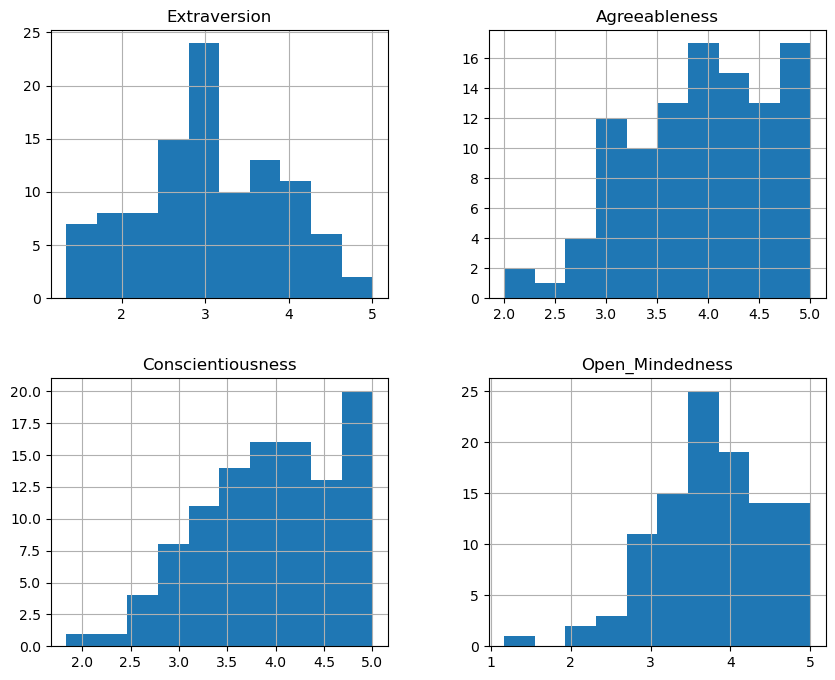

In [21]:
df_final.hist(figsize=(10,8))

In [22]:
df_final.corr()

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Extraversion,1.000000,0.130244,0.356257,0.171136
Agreeableness,0.130244,1.000000,0.347496,-0.023883
Conscientiousness,0.356257,0.347496,1.000000,0.089948
Open_Mindedness,0.171136,-0.023883,0.089948,1.000000


# Direct categorization

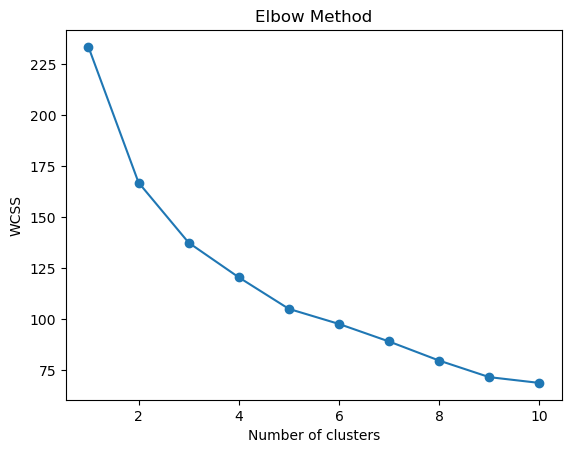

In [23]:
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette_score is: 0.2504797848578368
For n_clusters = 3, the average silhouette_score is: 0.23056960109143368
For n_clusters = 4, the average silhouette_score is: 0.2181721825097197
For n_clusters = 5, the average silhouette_score is: 0.20400616170187488
For n_clusters = 6, the average silhouette_score is: 0.22045747871878765
For n_clusters = 7, the average silhouette_score is: 0.217870211383976
For n_clusters = 8, the average silhouette_score is: 0.22021881632006648
For n_clusters = 9, the average silhouette_score is: 0.22211518412188747


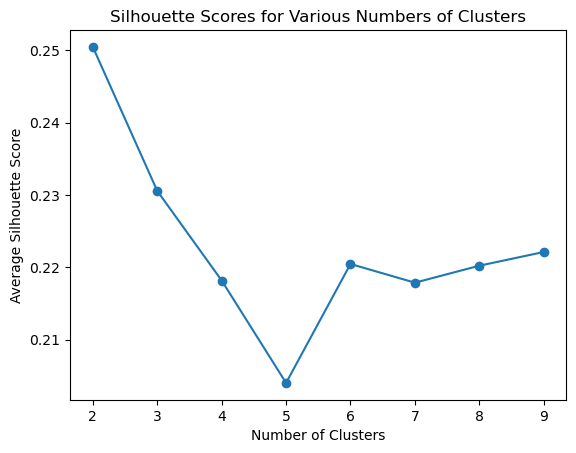

In [24]:
# Sample DataFrame 'df_final' containing your data

silhouette_scores = []
range_n_clusters = range(2, 10) 
num_trial = 15
silhouette_scores_trial = []
silhouette_best = 0
best_index = 0

for n_clusters in range_n_clusters:
    for i in range(num_trial):
        kmeans = KMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(df_final)
        silhouette_avg = silhouette_score(df_final, cluster_labels)
        silhouette_scores_trial.append(silhouette_avg)
        if silhouette_avg > silhouette_best:
            best_index = i
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_scores_trial[best_index]
    silhouette_scores.append(silhouette_avg)
    
    # reset
    silhouette_scores_trial = []
    best_index = 0
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [25]:
df_final.head()

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
10,3.666667,4.000000,3.500000,3.000000
11,3.833333,3.166667,4.166667,4.166667
12,4.166667,3.166667,4.666667,3.166667
13,3.166667,3.333333,3.000000,4.166667
14,3.000000,4.333333,3.500000,4.166667


In [26]:
df_final.shape

(104, 4)

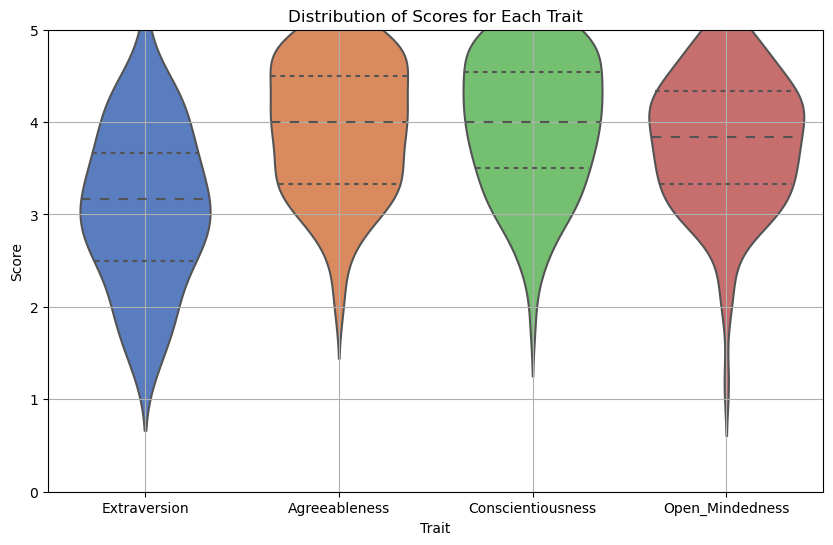

In [27]:
# Melt the DataFrame
df_melted = df_final.melt(var_name='Trait', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trait', y='Score', data=df_melted, inner='quartile', palette='muted')
plt.title('Distribution of Scores for Each Trait')
plt.ylim(0, 5)
plt.xlabel('Trait')
plt.ylabel('Score')
plt.grid(True)

# Show the plot
plt.show()

In [28]:
df_final.shape

(104, 4)

In [29]:
"""
# Function to remove data points from overrepresented regions
def balance_distribution(df, reference_trait, target_trait, drop_threshold=0.02):
    # Calculate the maximum number of rows to drop
    max_drops = int(len(df) * drop_threshold)
    initial_count = len(df)
    
    while True:
        # Calculate reference distribution stats
        ref_mean = df[reference_trait].mean()
        ref_std = df[reference_trait].std()
        
        # Calculate target distribution stats
        target_mean = df[target_trait].mean()
        target_std = df[target_trait].std()
        
        # Determine rows to remove
        deviation_from_mean = np.abs(df[target_trait] - ref_mean)
        rows_to_remove = deviation_from_mean.nlargest(max_drops).index
        
        # Remove the identified rows
        df = df.drop(rows_to_remove)
        
        # Check the new target distribution stats
        new_target_mean = df[target_trait].mean()
        new_target_std = df[target_trait].std()
        
        # Break if the target distribution is close enough or if no more rows can be dropped
        if new_target_mean == ref_mean or len(df) <= (initial_count * (1 - drop_threshold)):
            break
    
    return df

# Balance the distributions for the other traits
df_balanced = df_final.copy()
for trait in ['Agreeableness', 'Conscientiousness', 'Open_Mindedness']:
    df_balanced = balance_distribution(df_balanced, 'Extraversion', trait)
"""

"\n# Function to remove data points from overrepresented regions\ndef balance_distribution(df, reference_trait, target_trait, drop_threshold=0.02):\n    # Calculate the maximum number of rows to drop\n    max_drops = int(len(df) * drop_threshold)\n    initial_count = len(df)\n    \n    while True:\n        # Calculate reference distribution stats\n        ref_mean = df[reference_trait].mean()\n        ref_std = df[reference_trait].std()\n        \n        # Calculate target distribution stats\n        target_mean = df[target_trait].mean()\n        target_std = df[target_trait].std()\n        \n        # Determine rows to remove\n        deviation_from_mean = np.abs(df[target_trait] - ref_mean)\n        rows_to_remove = deviation_from_mean.nlargest(max_drops).index\n        \n        # Remove the identified rows\n        df = df.drop(rows_to_remove)\n        \n        # Check the new target distribution stats\n        new_target_mean = df[target_trait].mean()\n        new_target_std = d

In [30]:
#df_balanced.shape

In [31]:
"""
df_balanced_melted = df_balanced.melt(var_name='Trait', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trait', y='Score', data=df_balanced_melted, inner='quartile', palette='muted')
plt.title('Distribution of Scores for Each Trait After Balancing')
plt.ylim(0, 5)
plt.xlabel('Trait')
plt.ylabel('Score')
plt.grid(True)

# Show the plot
plt.show()
"""

"\ndf_balanced_melted = df_balanced.melt(var_name='Trait', value_name='Score')\n\n# Create a violin plot\nplt.figure(figsize=(10, 6))\nsns.violinplot(x='Trait', y='Score', data=df_balanced_melted, inner='quartile', palette='muted')\nplt.title('Distribution of Scores for Each Trait After Balancing')\nplt.ylim(0, 5)\nplt.xlabel('Trait')\nplt.ylabel('Score')\nplt.grid(True)\n\n# Show the plot\nplt.show()\n"

In [32]:
def fit_kmean(k, df):
    # K-means clustering
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(df)

    df_with_clusters = df_final.copy()
    df_with_clusters['Cluster'] = clusters

    return clusters, kmeans, df_with_clusters

In [33]:
def assess_kmean (df):
    X = df.iloc[:,:-1]
    X = sm.add_constant(X)
    y = df.iloc[:,-1]

    lr = sm.OLS(y, X)
    lr_result = lr.fit()

    summary = lr_result.summary()
    rsquared_adj = lr_result.rsquared_adj

    return summary, rsquared_adj

In [34]:
def run_cluster (df, k_range, trial, df_cluster_list, model_list, clusters_list, 
                 prioritized_benchmark, best_silhouette_score, best_davies_bouldin_score,
                 best_calinski_harabasz_score):
    for k in k_range:
        for i in range(trial):
            # Trying different clustering techniques with hyperparameter tuning
            if i % 5 == 0:
                # Hyperparameters for KMeans
                init_methods = ['k-means++', 'random']
                n_init = 10 if i < 5 else 20  # More initializations for later trials
                model = KMeans(n_clusters=k, init=init_methods[i % 2], n_init=n_init)
                model_name = "KMeans"
            elif i % 5 == 1:
                # Hyperparameters for AgglomerativeClustering
                linkage_methods = ['ward', 'complete', 'average', 'single']
                model = AgglomerativeClustering(n_clusters=k, linkage=linkage_methods[i % 4])
                model_name = "AgglomerativeClustering"
            elif i % 5 == 2:
                # Hyperparameters for DBSCAN
                eps_values = [0.3, 0.5, 0.7]
                min_samples_values = [5, 10, 15]
                model = DBSCAN(eps=eps_values[i % 3], min_samples=min_samples_values[i % 3])
                model_name = "DBSCAN"
            elif i % 5 == 3:
                # Hyperparameters for GaussianMixture
                covariance_types = ['full', 'tied', 'diag', 'spherical']
                model = GaussianMixture(n_components=k, covariance_type=covariance_types[i % 4])
                model_name = "GaussianMixture"
            else:
                # Hyperparameters for BIRCH
                threshold_values = [0.3, 0.5, 0.7]
                branching_factor_values = [25, 50]
                model = Birch(threshold=threshold_values[i % 3], branching_factor=branching_factor_values[i % 2], n_clusters=k)
                model_name = "BIRCH"
            
            # Fit the model and predict clusters
            if model_name == "GaussianMixture":
                clusters = model.fit_predict(df.iloc[:, :-1])
            else:
                clusters = model.fit_predict(df.iloc[:, :-1])
            
            # For DBSCAN, number of clusters may vary, redefine k based on unique labels
            if isinstance(model, DBSCAN):
                unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
                if unique_clusters < 2:
                    print(f"Skipping silhouette score calculation for DBSCAN with {unique_clusters} clusters at trial {i}.")
                    continue
            
            df_cluster = df.copy()
            df_cluster['Cluster'] = clusters
            
            df_cluster_list.append(df_cluster)
            model_list.append(model)
            clusters_list.append(clusters)
            
            # Assessing the clustering with multiple metrics
            silhouette_avg = silhouette_score(df.iloc[:, :-1], clusters)
            davies_bouldin_score_value = davies_bouldin_score(df.iloc[:, :-1], clusters)
            calinski_harabasz_score_value = calinski_harabasz_score(df.iloc[:, :-1], clusters)
            
            # Update best scores based on prioritized benchmark
            if prioritized_benchmark == 'silhouette':
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_davies_bouldin_score = davies_bouldin_score_value
                    best_calinski_harabasz_score = calinski_harabasz_score_value
                    best_k = k
                    best_model = model
                    best_index = len(df_cluster_list) - 1
                    best_clusters = clusters
                    final_summary = f"Best model at trial {i} with silhouette score: {silhouette_avg}, using {model_name}"
            elif prioritized_benchmark == 'davies_bouldin':
                if davies_bouldin_score_value < best_davies_bouldin_score:
                    best_davies_bouldin_score = davies_bouldin_score_value
                    best_silhouette_score = silhouette_avg
                    best_calinski_harabasz_score = calinski_harabasz_score_value
                    best_k = k
                    best_model = model
                    best_index = len(df_cluster_list) - 1
                    best_clusters = clusters
                    final_summary = f"Best model at trial {i} with Davies-Bouldin score: {davies_bouldin_score_value}, using {model_name}"
            elif prioritized_benchmark == 'calinski_harabasz':
                if calinski_harabasz_score_value > best_calinski_harabasz_score:
                    best_calinski_harabasz_score = calinski_harabasz_score_value
                    best_silhouette_score = silhouette_avg
                    best_davies_bouldin_score = davies_bouldin_score_value
                    best_k = k
                    best_model = model
                    best_index = len(df_cluster_list) - 1
                    best_clusters = clusters
                    final_summary = f"Best model at trial {i} with Calinski-Harabasz score: {calinski_harabasz_score_value}, using {model_name}"
            
            print(f"Trial {i}, k={k} done with silhouette score = {silhouette_avg}, Davies-Bouldin score = {davies_bouldin_score_value}, Calinski-Harabasz score: {calinski_harabasz_score_value} using {model_name}.")
    
    return df_cluster_list, model_list, clusters_list, run_cluster, best_k, best_silhouette_score, final_summary

In [35]:
# Determining the range for k and initializing variables
k_range = range(2, 5)
trial = 10
best_k = 2
best_index = 0
df_cluster_list = []
model_list = []
clusters_list = []
final_summary = None

#choose df
df = df_final

# Introducing additional metrics for a more comprehensive evaluation
best_silhouette_score = -1
best_davies_bouldin_score = float('inf')
best_calinski_harabasz_score = -1

# Set the prioritized benchmark here: 'silhouette', 'davies_bouldin', or 'calinski_harabasz'
prioritized_benchmark = 'silhouette'


df_cluster_list, model_list, clusters_list, run_cluster, best_k, best_silhouette_score, final_summary =  run_cluster(df, k_range, trial, df_cluster_list, 
                                                                                                                     model_list, clusters_list, prioritized_benchmark,
                                                                                                                     best_silhouette_score,
                                                                                                                     best_davies_bouldin_score,
                                                                                                                     best_calinski_harabasz_score)

Trial 0, k=2 done with silhouette score = 0.3072376479773149, Davies-Bouldin score = 1.2461789494597348, Calinski-Harabasz score: 55.681893790766 using KMeans.
Trial 1, k=2 done with silhouette score = 0.26070912506664173, Davies-Bouldin score = 1.3484641898006027, Calinski-Harabasz score: 43.64128433182896 using AgglomerativeClustering.
Skipping silhouette score calculation for DBSCAN with 1 clusters at trial 2.
Trial 3, k=2 done with silhouette score = 0.2521962143593534, Davies-Bouldin score = 1.0359387894010526, Calinski-Harabasz score: 38.355998132830244 using GaussianMixture.
Trial 4, k=2 done with silhouette score = 0.26110663105345383, Davies-Bouldin score = 1.1104725928273962, Calinski-Harabasz score: 31.377429824170783 using BIRCH.
Trial 5, k=2 done with silhouette score = 0.3072026395038088, Davies-Bouldin score = 1.2517809408201546, Calinski-Harabasz score: 55.614504799071575 using KMeans.
Trial 6, k=2 done with silhouette score = 0.36223556319425276, Davies-Bouldin score =

Best model at trial 6 with silhouette score: 0.36223556319425276, using AgglomerativeClustering


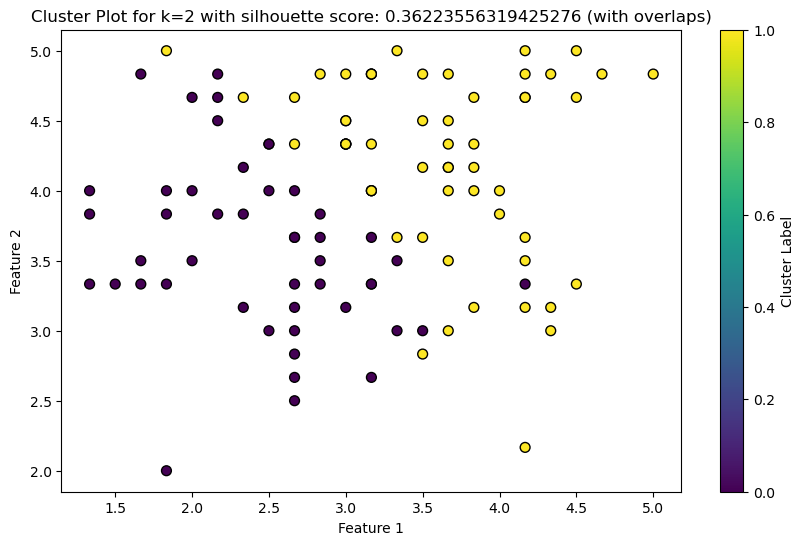

In [36]:
# show interim result
df_cluster = df_cluster_list[best_index]
model = model_list[best_index]
clusters = clusters_list[best_index]
print(final_summary)

# Plotting all samples with different colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster.iloc[:, 0], df_cluster.iloc[:, 1], c=df_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Cluster Plot for k={best_k} with silhouette score: {best_silhouette_score} (with overlaps)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [37]:
df_cluster_group = df_cluster.iloc[:,:6].groupby('Cluster').mean()
df_cluster_group

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Cluster,,,,
0,2.476667,3.626667,3.513333,3.710000
1,3.641975,4.206790,4.395062,3.830247


In [38]:
df_cluster.isna().sum()

Extraversion         0
Agreeableness        0
Conscientiousness    0
Open_Mindedness      0
Cluster              0
dtype: int64

In [39]:
df_cluster

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness,Cluster
10,3.666667,4.000000,3.500000,3.000000,1
11,3.833333,3.166667,4.166667,4.166667,1
12,4.166667,3.166667,4.666667,3.166667,1
13,3.166667,3.333333,3.000000,4.166667,0
14,3.000000,4.333333,3.500000,4.166667,0
...,...,...,...,...,...
127,3.333333,3.000000,3.166667,4.166667,0
128,3.500000,4.833333,4.333333,3.000000,1
130,3.666667,4.833333,4.333333,4.666667,1
132,3.833333,4.000000,4.666667,4.000000,1


In [40]:
# Calculate the centroids of each cluster
centroids = df_cluster.groupby('Cluster').mean()

# within the {given figure} percentile of distances to the other cluster's centroid
other_cluster_target_percentile = 0.05  # trial: 0.0, default: 0.10
own_cluster_target_percentile = 0.99    # trial: 1.0, default: 0.975

# Calculate the distance of each point to the centroids of all other clusters
def distance_to_other_clusters(row, centroids):
    cluster = row['Cluster']
    other_centroids = centroids.drop(cluster)
    distances = other_centroids.apply(lambda centroid: np.sqrt(((row[:-1] - centroid) ** 2).sum()), axis=1)
    return distances.min()

other_cluster_distances = df_cluster.apply(lambda row: distance_to_other_clusters(row, centroids), axis=1)

# Define a threshold for being considered as overlapping
overlap_thresholds = other_cluster_distances.quantile(other_cluster_target_percentile)

# Filter out the observations that are likely overlapping
df_cluster['other_cluster_distances'] = other_cluster_distances
df_cluster_final = df_cluster[df_cluster['other_cluster_distances'] > overlap_thresholds]

# Calculate the distance of each point to its own cluster centroid
own_cluster_distances = df_cluster_final.apply(
    lambda row: np.sqrt(((row[:-1] - centroids.loc[row['Cluster']]) ** 2).sum()), axis=1)

# Define a threshold for being considered as an outlier
outlier_thresholds = own_cluster_distances.groupby(df_cluster_final['Cluster']).quantile(own_cluster_target_percentile)

# Filter out the observations that are likely outliers
df_cluster_final['own_cluster_distances'] = own_cluster_distances
df_cluster_final = df_cluster_final.join(outlier_thresholds.rename('outlier_threshold'), on='Cluster')
df_cluster_final = df_cluster_final[df_cluster_final['own_cluster_distances'] <= df_cluster_final['outlier_threshold']]

df_cluster_final.shape[0]

96

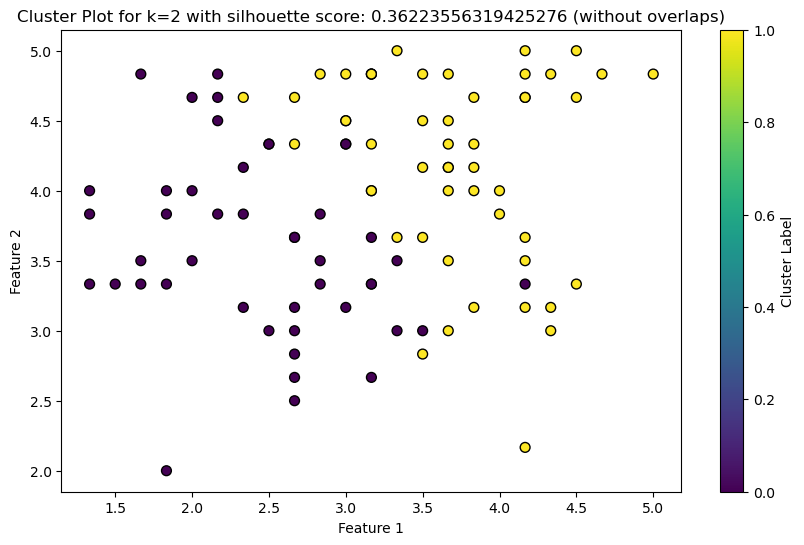

In [41]:
# Ensure the DataFrame is not empty before plotting
if not df_cluster_final.empty:
    # Plotting all samples with different colors for each cluster
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cluster_final.iloc[:, 0], df_cluster_final.iloc[:, 1], c=df_cluster_final['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'Cluster Plot for k={best_k} with silhouette score: {best_silhouette_score} (without overlaps)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()
else:
    print("No data available to plot after removing overlaps.")


In [42]:
df_cluster_final['Cluster'].value_counts()

Cluster
1    51
0    45
Name: count, dtype: int64

In [43]:
df_cluster_group = df_cluster_final.iloc[:,:6].groupby('Cluster').mean()
df_cluster_group

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness,other_cluster_distances
Cluster,,,,,
0,2.448148,3.60000,3.466667,3.744444,2.053191
1,3.699346,4.19281,4.395425,3.849673,1.949497


In [44]:
# 5 = max possible score in big five trait test
df_cluster_group_reversed = (5 + 1) -  df_cluster_group
df_cluster_group_reversed

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness,other_cluster_distances
Cluster,,,,,
0,3.551852,2.40000,2.533333,2.255556,3.946809
1,2.300654,1.80719,1.604575,2.150327,4.050503


# Optional: final streamlining

In [45]:
df_cluster

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness,Cluster,other_cluster_distances
10,3.666667,4.000000,3.500000,3.000000,1,1.435185
11,3.833333,3.166667,4.166667,4.166667,1,1.639370
12,4.166667,3.166667,4.666667,3.166667,1,2.166354
13,3.166667,3.333333,3.000000,4.166667,0,1.745915
14,3.000000,4.333333,3.500000,4.166667,0,1.158645
...,...,...,...,...,...,...
127,3.333333,3.000000,3.166667,4.166667,0,1.781498
128,3.500000,4.833333,4.333333,3.000000,1,1.918269
130,3.666667,4.833333,4.333333,4.666667,1,2.111813
132,3.833333,4.000000,4.666667,4.000000,1,1.842335


In [46]:
def calculate_distance_per_trait(row, columns):
    new_row = {}
    for col in columns:
        new_row[f'{col}_dist_from_0'] = abs(row[col] - df_cluster_group.loc[0, col])
        new_row[f'{col}_dist_from_1'] = abs(row[col] - df_cluster_group.loc[1, col])
    new_row['Cluster'] = row['Cluster']
    return new_row

In [47]:
# Include the 'Cluster' column and relevant trait columns
columns = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Open_Mindedness']
df_distance = df_cluster.apply(lambda row: calculate_distance_per_trait(row, columns), axis=1)
df_distance = pd.DataFrame(df_distance.tolist())
df_distance.head()


,Extraversion_dist_from_0,Extraversion_dist_from_1,Agreeableness_dist_from_0,Agreeableness_dist_from_1,Conscientiousness_dist_from_0,Conscientiousness_dist_from_1,Open_Mindedness_dist_from_0,Open_Mindedness_dist_from_1,Cluster
0,1.218519,0.032680,0.400000,0.192810,0.033333,0.895425,0.744444,0.849673,1.0
1,1.385185,0.133987,0.433333,1.026144,0.700000,0.228758,0.422222,0.316993,1.0
2,1.718519,0.467320,0.433333,1.026144,1.200000,0.271242,0.577778,0.683007,1.0
3,0.718519,0.532680,0.266667,0.859477,0.466667,1.395425,0.422222,0.316993,0.0
4,0.551852,0.699346,0.733333,0.140523,0.033333,0.895425,0.422222,0.316993,0.0


In [48]:
df_distance['Total_distance_from_0'] = df_distance.filter(regex='_0$').sum(axis=1)
df_distance['Total_distance_from_1'] = df_distance.filter(regex='_1$').sum(axis=1)

def minmax_normalization(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalizing the total distances using the minmax_normalization function
df_distance['Normalized_Total_distance_from_0'] = minmax_normalization(df_distance['Total_distance_from_0'])
df_distance['Normalized_Total_distance_from_1'] = minmax_normalization(df_distance['Total_distance_from_1'])

df_distance.head()


,Extraversion_dist_from_0,Extraversion_dist_from_1,Agreeableness_dist_from_0,Agreeableness_dist_from_1,Conscientiousness_dist_from_0,Conscientiousness_dist_from_1,Open_Mindedness_dist_from_0,Open_Mindedness_dist_from_1,Cluster,Total_distance_from_0,Total_distance_from_1,Normalized_Total_distance_from_0,Normalized_Total_distance_from_1
0,1.218519,0.032680,0.400000,0.192810,0.033333,0.895425,0.744444,0.849673,1.0,2.396296,1.970588,0.297240,0.239270
1,1.385185,0.133987,0.433333,1.026144,0.700000,0.228758,0.422222,0.316993,1.0,2.940741,1.705882,0.401274,0.195815
2,1.718519,0.467320,0.433333,1.026144,1.200000,0.271242,0.577778,0.683007,1.0,3.929630,2.447712,0.590234,0.317597
3,0.718519,0.532680,0.266667,0.859477,0.466667,1.395425,0.422222,0.316993,0.0,1.874074,3.104575,0.197452,0.425429
4,0.551852,0.699346,0.733333,0.140523,0.033333,0.895425,0.422222,0.316993,0.0,1.740741,2.052288,0.171975,0.252682


array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

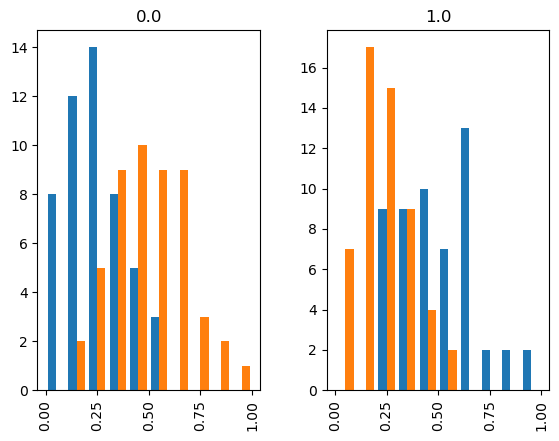

In [49]:
df_distance[['Normalized_Total_distance_from_0', 'Normalized_Total_distance_from_1']].hist(by=df_distance['Cluster'])

In [50]:
within_cluster_threshold = 0.55
other_cluster_threshold = 0.25

df_distance_stmd = df_distance.copy()
df_distance_stmd = df_distance_stmd[((df_distance_stmd['Cluster'] == 0) & 
                                     (df_distance_stmd['Normalized_Total_distance_from_0'] < within_cluster_threshold) & 
                                     (df_distance_stmd['Normalized_Total_distance_from_1'] > other_cluster_threshold)) |
                                    ((df_distance_stmd['Cluster'] == 1) & 
                                     (df_distance_stmd['Normalized_Total_distance_from_1'] < within_cluster_threshold) & 
                                     (df_distance_stmd['Normalized_Total_distance_from_0'] > other_cluster_threshold))]


df_distance_stmd.shape

(91, 13)

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

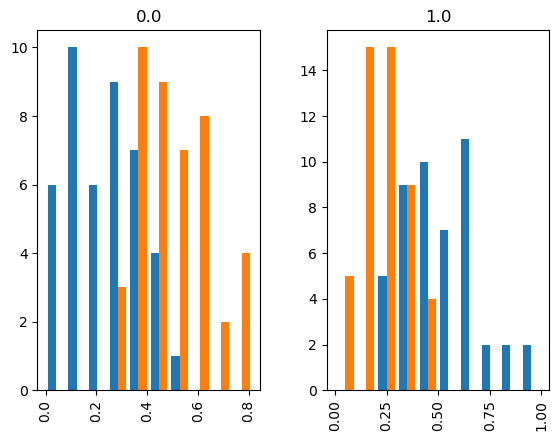

In [51]:
df_distance_stmd[['Normalized_Total_distance_from_0', 'Normalized_Total_distance_from_1']].hist(by=df_distance_stmd['Cluster'])


In [52]:
df_cluster_stmd = df_cluster[df_cluster.index.isin(df_distance_stmd.index)]
df_cluster_stmd.shape

(68, 6)

In [53]:
df_cluster_stmd['Cluster'].value_counts()

Cluster
1    34
0    34
Name: count, dtype: int64

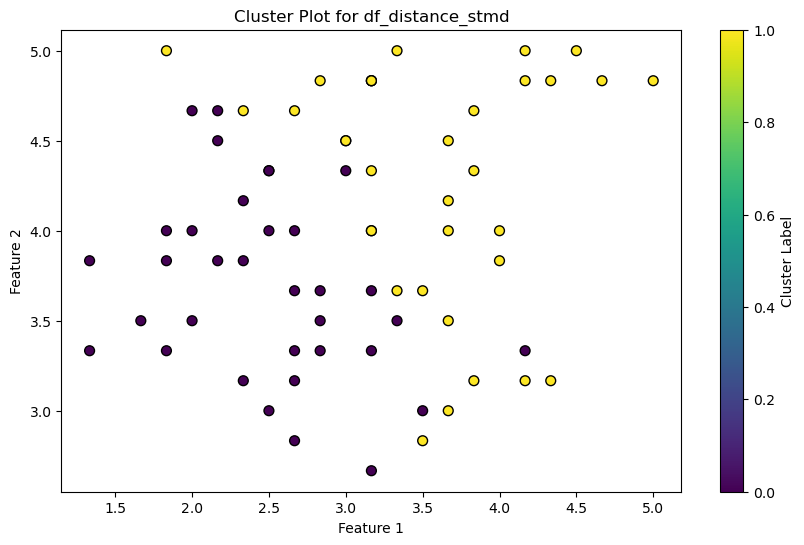

In [54]:
# Plotting all samples with different colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster_stmd.iloc[:, 0], df_cluster_stmd.iloc[:, 1], c=df_cluster_stmd['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Cluster Plot for df_distance_stmd')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()